<a href="https://colab.research.google.com/github/alik604/Notebooks/blob/master/google-Colab/correlation_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo of `from statsmodels.tsa.stattools import grangercausalitytests`
> Written Summer 2018. Rerun Summer 2021. I still dont understand it haha. (p-value that x causes y?)

In [1]:
# Importing the libraries
import math
import scipy
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

import yfinance as yf

In [2]:

DATA = "2000-1-1"
SPX = yf.download('spy',DATA).drop(columns=  ['Open','High', 'Low','Adj Close','Volume'])

df = pd.DataFrame({
    'SPX':SPX.Close,
    'SPX_MA_3':SPX.Close.rolling(window=3).mean(),
    'SPX_shift_3':SPX.Close.shift(periods= 3),
    'SPXL':yf.download('SPXL', DATA).drop(columns=['Open','High', 'Low','Adj Close','Volume']).Close,
    'QQQ':yf.download('qqq',   DATA).drop(columns=['Open','High', 'Low','Adj Close','Volume']).Close,
    'TQQQ':yf.download('TQQQ', DATA).drop(columns=['Open','High', 'Low','Adj Close','Volume']).Close,
    'GDX':yf.download('GDX',   DATA).drop(columns=['Open','High', 'Low','Adj Close','Volume']).Close,
    'GLD':yf.download('GLD',   DATA).drop(columns=['Open','High', 'Low','Adj Close','Volume']).Close,
    'GOLD':yf.download('XAU',  DATA).drop(columns=['Open','High', 'Low','Adj Close','Volume']).Close
})

df.dropna(inplace=True)
df.head(5)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,SPX,SPX_MA_3,SPX_shift_3,SPXL,QQQ,TQQQ,GDX,GLD,GOLD
Date,,,,,,,,,
2013-02-26,150.020004,150.303335,150.419998,8.460000,66.559998,2.275417,39.049999,156.220001,0.13
2013-02-27,151.910004,150.310003,151.889999,8.773333,67.239998,2.344583,38.259998,154.570007,0.13
2013-02-28,151.610001,151.180003,149.000000,8.700000,67.099998,2.335833,37.400002,153.000000,0.13
2013-03-01,152.110001,151.876668,150.020004,8.818333,67.379997,2.360000,37.110001,152.440002,0.13
2013-03-04,152.919998,152.213333,151.910004,8.949167,67.680000,2.390417,35.910000,152.300003,0.10


In [3]:
mse = mean_squared_error(df.SPX, df.QQQ)
mse

9746.982492264618

In [4]:
norm_df=(df-df.min())/(df.max()-df.min())
norm_df.head()

,SPX,SPX_MA_3,SPX_shift_3,SPXL,QQQ,TQQQ,GDX,GLD,GOLD
Date,,,,,,,,,
2013-02-26,0.000000,0.000000,0.010573,0.000000,0.000000,0.000000,1.000000,0.999462,0.006984
2013-02-27,0.013840,0.000050,0.021519,0.006809,0.006515,0.002465,0.970278,0.969866,0.006984
2013-02-28,0.011643,0.006516,0.000000,0.005215,0.005174,0.002153,0.937923,0.941704,0.006984
2013-03-01,0.015305,0.011693,0.007595,0.007786,0.007857,0.003015,0.927013,0.931659,0.006984
2013-03-04,0.021236,0.014195,0.021668,0.010629,0.010731,0.004099,0.881866,0.929148,0.003175


In [5]:
mse = mean_squared_error(norm_df.SPX, norm_df.GLD)
mse

0.09808706000887205

In [6]:
def get_mse_df(df=df):
  Matrix = [[round(mean_squared_error(df.iloc[:, row],df.iloc[:, col]),6) for row in range(df.columns.size)] for col in range(df.columns.size)] 
  cols = df.columns

  mse_df = pd.DataFrame(Matrix, columns=cols, index=cols)
  return mse_df

mse_df=get_mse_df(norm_df)
mse_df

,SPX,SPX_MA_3,SPX_shift_3,SPXL,QQQ,TQQQ,GDX,GLD,GOLD
SPX,0.000000,0.000085,0.000505,0.012054,0.001424,0.026386,0.093452,0.098087,0.057934
SPX_MA_3,0.000085,0.000000,0.000264,0.012922,0.001483,0.027555,0.095187,0.100049,0.058749
SPX_shift_3,0.000505,0.000264,0.000000,0.015238,0.002130,0.030700,0.096057,0.101328,0.061079
SPXL,0.012054,0.012922,0.015238,0.000000,0.010233,0.003214,0.089919,0.087522,0.046098
QQQ,0.001424,0.001483,0.002130,0.010233,0.000000,0.021489,0.104782,0.107771,0.049407
TQQQ,0.026386,0.027555,0.030700,0.003214,0.021489,0.000000,0.102616,0.095916,0.044658
GDX,0.093452,0.095187,0.096057,0.089919,0.104782,0.102616,0.000000,0.004466,0.151234
GLD,0.098087,0.100049,0.101328,0.087522,0.107771,0.095916,0.004466,0.000000,0.148044
GOLD,0.057934,0.058749,0.061079,0.046098,0.049407,0.044658,0.151234,0.148044,0.000000


In [7]:
norm_df.corr()

,SPX,SPX_MA_3,SPX_shift_3,SPXL,QQQ,TQQQ,GDX,GLD,GOLD
SPX,1.000000,0.999226,0.995949,0.987741,0.991410,0.967925,-0.253394,-0.357541,0.686482
SPX_MA_3,0.999226,1.000000,0.997884,0.986674,0.991271,0.967226,-0.256636,-0.360644,0.687352
SPX_shift_3,0.995949,0.997884,1.000000,0.982738,0.989166,0.963932,-0.262508,-0.366229,0.687650
SPXL,0.987741,0.986674,0.982738,1.000000,0.980085,0.990097,-0.187927,-0.268224,0.653496
QQQ,0.991410,0.991271,0.989166,0.980085,1.000000,0.976068,-0.282307,-0.370852,0.728362
TQQQ,0.967925,0.967226,0.963932,0.990097,0.976068,1.000000,-0.195854,-0.249089,0.670448
GDX,-0.253394,-0.256636,-0.262508,-0.187927,-0.282307,-0.195854,1.000000,0.938082,-0.292432
GLD,-0.357541,-0.360644,-0.366229,-0.268224,-0.370852,-0.249089,0.938082,1.000000,-0.360520
GOLD,0.686482,0.687352,0.687650,0.653496,0.728362,0.670448,-0.292432,-0.360520,1.000000


In [8]:
from statsmodels.tsa.stattools import grangercausalitytests

In [9]:
gc_res = grangercausalitytests(norm_df[['SPX', 'SPX_MA_3']],5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6244  , p=0.2027  , df_denom=1180, df_num=1
ssr based chi2 test:   chi2=1.6285  , p=0.2019  , df=1
likelihood ratio test: chi2=1.6274  , p=0.2021  , df=1
parameter F test:         F=1.6244  , p=0.2027  , df_denom=1180, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1328  , p=0.8756  , df_denom=1177, df_num=2
ssr based chi2 test:   chi2=0.2668  , p=0.8751  , df=2
likelihood ratio test: chi2=0.2667  , p=0.8751  , df=2
parameter F test:         F=0.1328  , p=0.8756  , df_denom=1177, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.6690  , p=0.0119  , df_denom=1174, df_num=3
ssr based chi2 test:   chi2=11.0727 , p=0.0113  , df=3
likelihood ratio test: chi2=11.0211 , p=0.0116  , df=3
parameter F test:         F=3.6690  , p=0.0119  , df_denom=1174, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.8679  , p=0.

In [10]:
gc_res = grangercausalitytests(norm_df[['SPX', 'SPX_shift_3']],5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8322  , p=0.1761  , df_denom=1180, df_num=1
ssr based chi2 test:   chi2=1.8369  , p=0.1753  , df=1
likelihood ratio test: chi2=1.8355  , p=0.1755  , df=1
parameter F test:         F=1.8322  , p=0.1761  , df_denom=1180, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.7697  , p=0.0233  , df_denom=1177, df_num=2
ssr based chi2 test:   chi2=7.5715  , p=0.0227  , df=2
likelihood ratio test: chi2=7.5473  , p=0.0230  , df=2
parameter F test:         F=3.7697  , p=0.0233  , df_denom=1177, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4513  , p=0.0620  , df_denom=1174, df_num=3
ssr based chi2 test:   chi2=7.3977  , p=0.0602  , df=3
likelihood ratio test: chi2=7.3746  , p=0.0609  , df=3
parameter F test:         F=2.4513  , p=0.0620  , df_denom=1174, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0522  , p=0.

In [11]:
gc_res = grangercausalitytests(norm_df[['SPX', 'SPXL']],5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3315  , p=0.1270  , df_denom=1180, df_num=1
ssr based chi2 test:   chi2=2.3374  , p=0.1263  , df=1
likelihood ratio test: chi2=2.3351  , p=0.1265  , df=1
parameter F test:         F=2.3315  , p=0.1270  , df_denom=1180, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1046  , p=0.3317  , df_denom=1177, df_num=2
ssr based chi2 test:   chi2=2.2187  , p=0.3298  , df=2
likelihood ratio test: chi2=2.2166  , p=0.3301  , df=2
parameter F test:         F=1.1046  , p=0.3317  , df_denom=1177, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8506  , p=0.4663  , df_denom=1174, df_num=3
ssr based chi2 test:   chi2=2.5671  , p=0.4633  , df=3
likelihood ratio test: chi2=2.5643  , p=0.4638  , df=3
parameter F test:         F=0.8506  , p=0.4663  , df_denom=1174, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6886  , p=0.

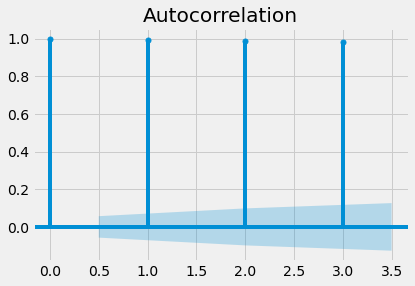

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.SPX_shift_3,lags=3)
plt.show()

<AxesSubplot:>

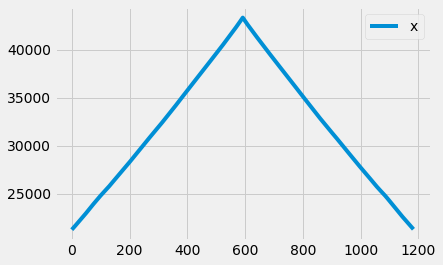

In [13]:
x =scipy.signal.correlate(df.SPX,df.SPX_shift_3,mode='same')/len(df.SPX) # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.correlate.html

x=pd.DataFrame({'x':x})
x.plot()

In [14]:

# DGLD = yf.download('DGLD',"1990-1-1").drop(columns=['Open','High', 'Low','Adj Close','Volume'])

# DGLD['MA'] = DGLD.rolling(180).sum()/180
# DGLD.plot(figsize=(18,6))